In [80]:
# pip install imbalanced-learn
# LIBRERIAS DE USO
import numpy as np
import pandas as pd
from urllib.parse import urlparse
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [81]:
data_url = pd.read_csv("../../data/Data_Predic.csv",header=0)
data_url.head()

,url,label,result,largo_url,largo_hostname,largo_path,dimension_directorio,num_guionesbajos,num_arrobas,num_interrogacion,...,num_puntos,num_iguales,num_http,num_https,num_www,num_numericos,num_letras,num_dir,manejo_ip,servicio
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,2,0,1,1,1,0,20,0,1,1


In [82]:
# Definir Variables
dataurl_X = data_url.iloc[:,3:]
dataurl_Y = data_url["result"]

In [83]:
print(dataurl_X)

        largo_url  largo_hostname  largo_path  dimension_directorio  \
0              22              14           0                     0   
1              23              15           0                     0   
2              24              16           0                     0   
3              21              13           0                     0   
4              25              17           0                     0   
...           ...             ...         ...                   ...   
450171         43              11          25                     8   
450172        159              13         139                     2   
450173        147              13         127                     2   
450174         22              14           1                     0   
450175        143              18         118                     4   

        num_guionesbajos  num_arrobas  num_interrogacion  num_percent  \
0                      0            0                  0            0   
1

In [84]:
print(dataurl_Y)

0         0
1         0
2         0
3         0
4         0
         ..
450171    1
450172    1
450173    1
450174    1
450175    1
Name: result, Length: 450176, dtype: int64


In [85]:
x_train, x_test, y_train, y_test = train_test_split(dataurl_X, dataurl_Y, test_size = 0.2)

In [86]:
print(len(x_train))

360140


In [87]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [88]:
modelo_det = Sequential()
modelo_det.add(Dense(32, activation="relu", input_shape=(18,)))
modelo_det.add(Dense(16, activation='relu'))
modelo_det.add(Dense(8, activation='relu'))
modelo_det.add(Dropout(rate=0.75))
modelo_det.add(Flatten())
modelo_det.add(Dense(4, activation='relu'))
modelo_det.add(Dense(2, activation='relu'))
modelo_det.add(Dense(1, activation='sigmoid'))
modelo_det.summary()

c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321 (5.16 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
opt = keras.optimizers.Adam(learning_rate=0.00001)
modelo_det.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [90]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [91]:
history = modelo_det.fit(x_train, y_train, epochs=100,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.7192 - loss: 0.7175 - val_acc: 0.7697 - val_loss: 0.6894
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7574 - loss: 0.6903 - val_acc: 0.7688 - val_loss: 0.6858
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7689 - loss: 0.6846 - val_acc: 0.7704 - val_loss: 0.6821
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7692 - loss: 0.6808 - val_acc: 0.7704 - val_loss: 0.6784
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.7699 - loss: 0.6772 - val_acc: 0.7705 - val_loss: 0.6749
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.7693 - loss: 0.6736 - val_acc: 0.7706 - val_loss: 0.6714
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7702 - loss: 0.6699 - val_acc: 0.7707 - val_loss: 0.6679
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7705 - loss: 0.6664 - val_acc: 0.7708 - val_loss: 0.6645
Epoch 9/100
1407/1407 ━━━━━━━━━

In [92]:
print(history.history.keys())

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


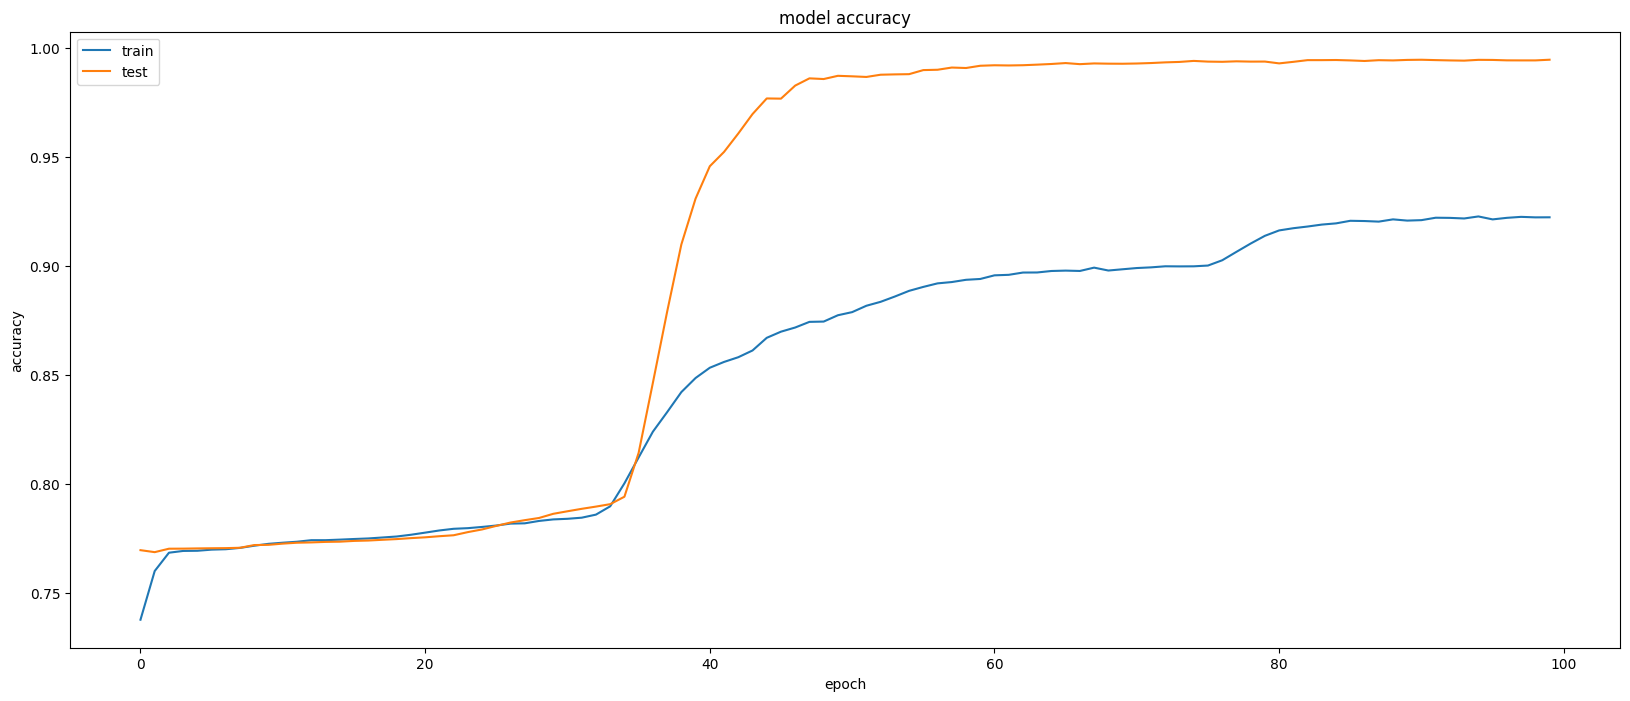

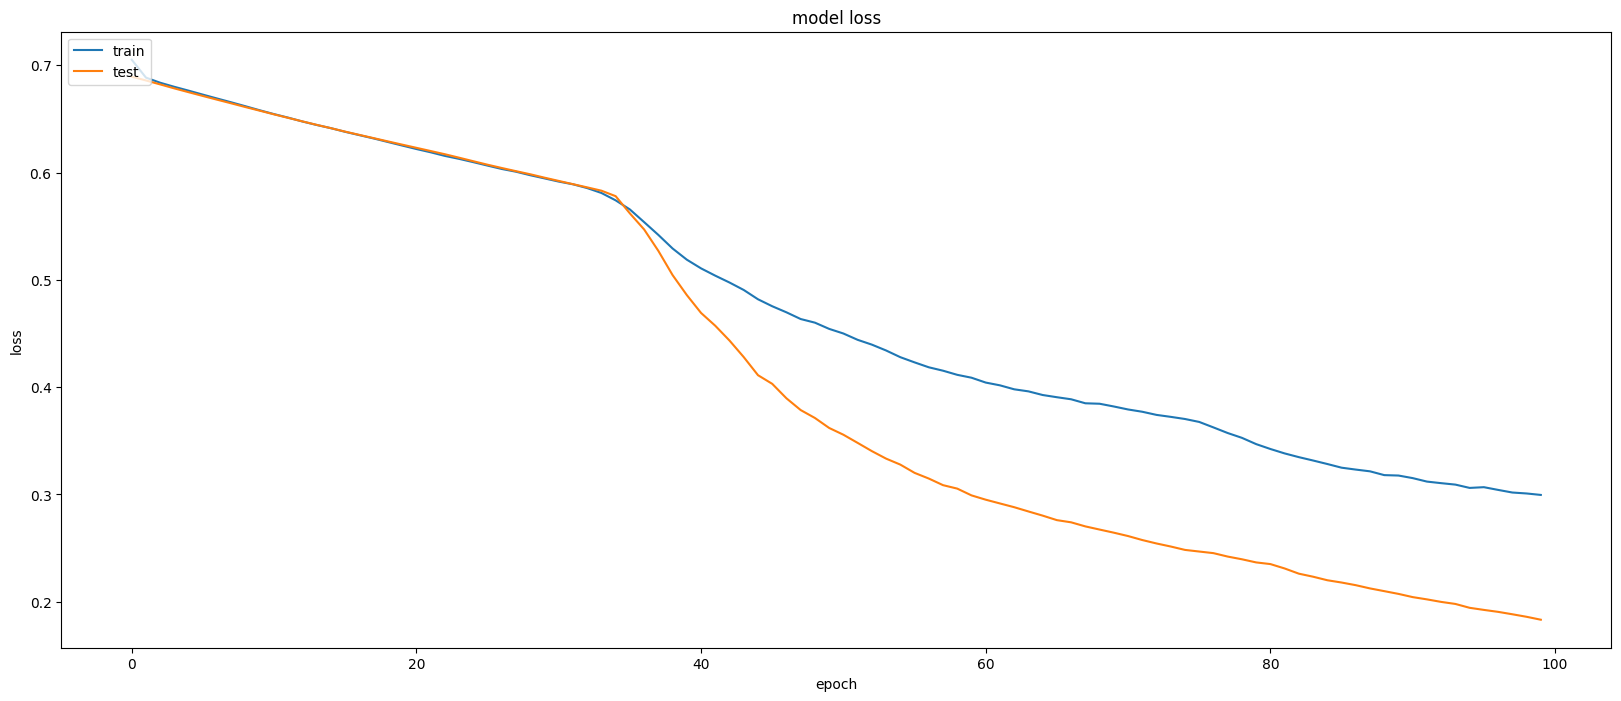

In [93]:
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
loss, acc = modelo_det.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

2814/2814 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.9942 - loss: 0.1834
Test loss: 0.1831880360841751
Test Accuracy: 0.9945021867752075


In [95]:
y_pred = modelo_det.predict(x_test)

2814/2814 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
print(len(y_pred))

def obtencion_prediccion(y_pred):
    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

90036


In [98]:
obtencion_prediccion(y_pred)

In [99]:
print(y_test)
print(y_pred)

63280     0
9253      0
150094    0
55614     0
238696    0
         ..
364252    1
288944    0
338672    0
292104    0
109248    0
Name: result, Length: 90036, dtype: int64
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


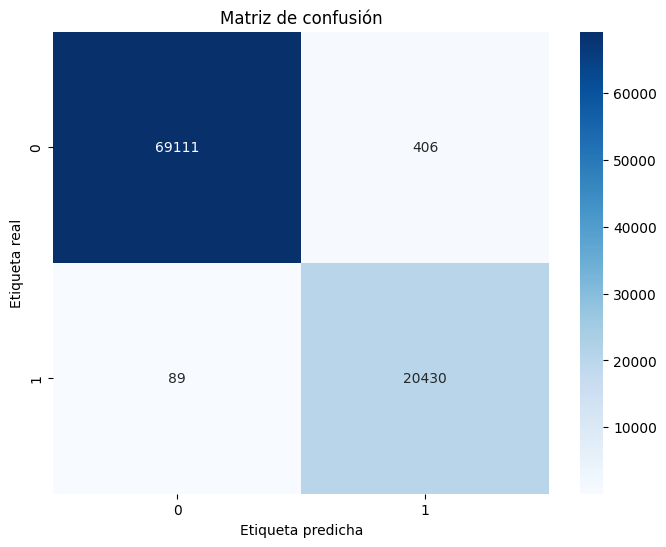

In [100]:
matriz_conf = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.show()

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

In [102]:
def evaluation(model, name, X_train, y_train, X_test, y_test):
    model_dict = {}
    model_dict['name'] = name
    #y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    obtencion_prediccion(y_pred_test)

    matriz_confusion = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
    vp,fp,fn,vn = matriz_confusion.ravel()
    model_dict['Precision Global'] = ((vp+vn)/(vp+fp+fn+vn))
    model_dict['Error Global'] = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
    model_dict['Precision Positiva (PP)'] = (vp/(vp+fp))
    model_dict['Precision Negativa (PN)'] = (vn/(vn+fn))
    model_dict['Falsos Positivos (FP)'] = (fp/(vn+fp))
    model_dict['Falsos Negativos (FN)'] = (fn/(vp+fn))
    model_dict['Asertividad Positiva (AP)'] = (vp/(vp+fn))
    model_dict['Asertividad Negativa (AN)'] = (vn/(vn+fp))
    model_dict['Puntaje de F1'] = f1_score(y_true = y_test, y_pred = y_pred_test, average='weighted')
    
    return model_dict

In [103]:
evaluacion = list()
evaluacion.append(evaluation(model=modelo_det, name=modelo_det, X_train=x_train, y_train=y_train, X_test=x_test, y_test=y_test))

   1/2814 ━━━━━━━━━━━━━━━━━━━━ 1:18 28ms/step

2814/2814 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [104]:
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

,Precision Global,Error Global,Precision Positiva (PP),Precision Negativa (PN),Falsos Positivos (FP),Falsos Negativos (FN),Asertividad Positiva (AP),Asertividad Negativa (AN),Puntaje de F1
name,,,,,,,,,
"<Sequential name=sequential_1, built=True>",0.994502,0.005498,0.998714,0.980514,0.004337,0.00584,0.99416,0.995663,0.994487


In [105]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

2814/2814 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


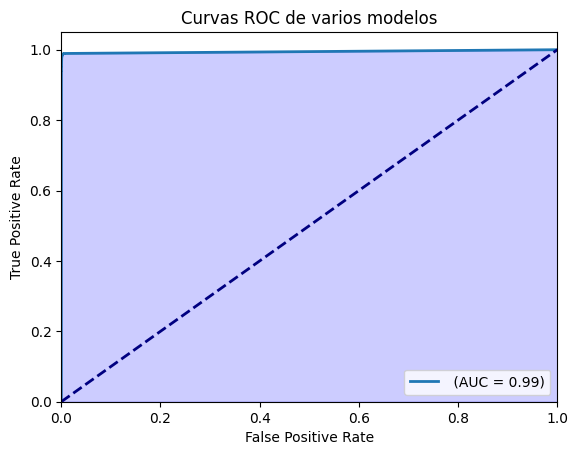

In [106]:
y_pred_test = modelo_det.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f' (AUC = {roc_auc:.2f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC de varios modelos')
plt.legend(loc="lower right")

# Muestra la gráfica
plt.show()

In [189]:
def dimension_direccion(url):
    url_path = urlparse(url).path
    try:
        return len(url_path.split('/')[1])
    except:
        return 0 
    

def detectar_numericos(url):
    cant_numeros = 0
    for i in url:
        if i.isnumeric():
            cant_numeros += 1
    return cant_numeros

def detectar_letras(url):
    cant_letras = 0
    for i in url:
        if i.isalpha():
            cant_letras += 1
    return cant_letras

def no_dir(url):
    url_dir = urlparse(url).path
    return url_dir.count('/')

def localizacion_dirIP(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  
    if match:
        return -1
    else:
        return 1

def localizacion_servicio(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match: 
        return -1
    else:
        return 1
    

In [190]:
predict_url = pd.DataFrame(columns=dataurl_X.columns.tolist(), index=[0])

In [191]:
url_p = "https://cuevana33.co/"

In [197]:
predict_url['largo_url'] = len(url_p)
predict_url['largo_hostname'] = len(urlparse(url_p).netloc)
predict_url['largo_path'] = len(urlparse(url_p).path)
predict_url['dimension_directorio'] = dimension_direccion(url_p)
predict_url['num_guionesbajos'] = len(re.findall('_', url_p))
predict_url['num_arrobas'] = url_p.count('@')
predict_url['num_interrogacion'] = url_p.count('?')
predict_url['num_percent'] = url_p.count('%')
predict_url['num_puntos'] = url_p.count('.')
predict_url['num_iguales'] = url_p.count('=')
predict_url['num_http'] = url_p.count('http')
predict_url['num_https'] = url_p.count('https')
predict_url['num_www'] = url_p.count('www')
predict_url['num_numericos'] = detectar_numericos(url_p)
predict_url['num_letras'] = detectar_letras(url_p)
predict_url['num_dir'] = no_dir(url_p)
predict_url['manejo_ip'] = localizacion_dirIP(url_p)
predict_url['servicio'] = localizacion_servicio(url_p)


In [198]:
predict_url

,largo_url,largo_hostname,largo_path,dimension_directorio,num_guionesbajos,num_arrobas,num_interrogacion,num_percent,num_puntos,num_iguales,num_http,num_https,num_www,num_numericos,num_letras,num_dir,manejo_ip,servicio
0,19,10,1,0,0,0,0,0,1,0,1,1,0,0,14,1,1,-1


In [200]:
url_pred = modelo_det.predict(predict_url)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [201]:
print(url_pred)

[[0.36326164]]
